In [1]:
from copy import copy, deepcopy

import numpy as np
from baseClasses.BaseEffect import BaseEffect
from settings.BaseConfiguration import Configuration
from baseClasses.RelicStats import RelicStats
from estimator.DefaultEstimator import DefaultEstimator
from visualizer.visualizer import visualize

from characters.destruction.Arlan import Arlan
from characters.destruction.Blade import Blade
from characters.destruction.Clara import Clara
from characters.destruction.Hook import Hook
from characters.destruction.Jingliu import Jingliu
from characters.destruction.Lunae import Lunae

from characters.erudition.Herta import Herta
from characters.erudition.Himeko import Himeko
from characters.erudition.JingYuan import JingYuan
from characters.erudition.Serval import Serval
from characters.erudition.Qingque import Qingque

from characters.harmony.Tingyun import Tingyun
from characters.harmony.Bronya import Bronya

from characters.hunt.DanHeng import DanHeng
from characters.hunt.Seele import Seele
from characters.hunt.Sushang import Sushang
from characters.hunt.Topaz import Topaz
from characters.hunt.Yanqing import Yanqing

from characters.nihility.Guinaifen import Guinaifen
from characters.nihility.Kafka import Kafka
from characters.nihility.Luka import Luka
from characters.nihility.Sampo import Sampo
from characters.nihility.SilverWolf import SilverWolf
from characters.nihility.Welt import Welt

from lightCones.destruction.ASecretVow import ASecretVow
from lightCones.destruction.BrighterThanTheSun import BrighterThanTheSun
from lightCones.destruction.IShallBeMyOwnSword import IShallBeMyOwnSword
from lightCones.destruction.NowhereToRun import NowhereToRun
from lightCones.destruction.OnTheFallOfAnAeon import OnTheFallOfAnAeon
from lightCones.destruction.SomethingIrreplaceable import SomethingIrreplaceable
from lightCones.destruction.TheMolesWelcomeYou import TheMolesWelcomeYou
from lightCones.destruction.TheUnreachableSide import TheUnreachableSide
from lightCones.destruction.UnderTheBlueSky import UnderTheBlueSky
from lightCones.destruction.WoofWalkTime import WoofWalkTime

from lightCones.erudition.BeforeDawn import BeforeDawn
from lightCones.erudition.GeniusesRepose import GeniusesRepose
from lightCones.erudition.MakeTheWorldClamor import MakeTheWorldClamor
from lightCones.erudition.NightOnTheMilkyWay import NightOnTheMilkyWay
from lightCones.erudition.TheBirthOfTheSelf import TheBirthOfTheSelf
from lightCones.erudition.TheSeriousnessOfBreakfast import TheSeriousnessOfBreakfast
from lightCones.erudition.TodayIsAnotherPeacefulDay import TodayIsAnotherPeacefulDay

from lightCones.harmony.ButTheBattleIsntOver import ButTheBattleIsntOver
from lightCones.harmony.CarveTheMoonWeaveTheClouds import CarveTheMoonWeaveTheClouds
from lightCones.harmony.DanceDanceDance import DanceDanceDance
from lightCones.harmony.MemoriesOfThePast import MemoriesOfThePast
from lightCones.harmony.MeshingCogs import MeshingCogs
from lightCones.harmony.PastAndFuture import PastAndFuture
from lightCones.harmony.PlanetaryRendezvous import PlanetaryRendezvous

from lightCones.hunt.CruisingInTheStellarSea import CruisingInTheStellarSea
from lightCones.hunt.InTheNight import InTheNight
from lightCones.hunt.OnlySilenceRemains import OnlySilenceRemains
from lightCones.hunt.ReturnToDarkness import ReturnToDarkness
from lightCones.hunt.RiverFlowsInSpring import RiverFlowsInSpring
from lightCones.hunt.SleepLikeTheDead import SleepLikeTheDead
from lightCones.hunt.Swordplay import Swordplay
from lightCones.hunt.WorrisomeBlissful import WorrisomeBlissful

from lightCones.nihility.BeforeTheTutorialMissionStarts import BeforeTheTutorialMissionStarts
from lightCones.nihility.EyesOfThePrey import EyesOfThePrey
from lightCones.nihility.Fermata import Fermata
from lightCones.nihility.GoodNightAndSleepWell import GoodNightAndSleepWell
from lightCones.nihility.InTheNameOfTheWorld import InTheNameOfTheWorld
from lightCones.nihility.IncessantRain import IncessantRain
from lightCones.nihility.PatienceIsAllYouNeed import PatienceIsAllYouNeed
from lightCones.nihility.ResolutionShinesAsPearlsOfSweat import ResolutionShinesAsPearlsOfSweat
from lightCones.nihility.SolitaryHealing import SolitaryHealing
from lightCones.nihility.WeWillMeetAgain import WeWillMeetAgain

from lightCones.preservation.DayOneOfMyNewLife import DayOneOfMyNewLife
from lightCones.preservation.LandausChoice import LandausChoice
from lightCones.preservation.MomentOfVictory import MomentOfVictory
from lightCones.preservation.SheAlreadyShutHerEyes import SheAlreadyShutHerEyes
from lightCones.preservation.TextureOfMemories import TextureOfMemories
from lightCones.preservation.ThisIsMe import ThisIsMe
from lightCones.preservation.TrendOfTheUniversalMarket import TrendOfTheUniversalMarket
from lightCones.preservation.WeAreWildfire import WeAreWildfire

from relicSets.relicSets.BandOfSizzlingThunder import BandOfSizzlingThunder2pc, BandOfSizzlingThunder4pc
from relicSets.relicSets.ChampionOfStreetwiseBoxing import ChampionOfStreetwiseBoxing2pc, ChampionOfStreetwiseBoxing4pc
from relicSets.relicSets.EagleOfTwilightLine import EagleOfTwilightLine2pc, EagleOfTwilightLine4pc
from relicSets.relicSets.FiresmithOfLavaForging import FiresmithOfLavaForging2pc, FiresmithOfLavaForging4pc
from relicSets.relicSets.GeniusOfBrilliantStars import GeniusOfBrilliantStars2pc, GeniusOfBrilliantStars4pc
from relicSets.relicSets.GuardOfWutheringSnow import GuardOfWutheringSnow2pc
from relicSets.relicSets.HunterOfGlacialForest import HunterOfGlacialForest2pc, HunterOfGlacialForest4pc
from relicSets.relicSets.KnightOfPurityPalace import KnightOfPurityPalace2pc, KnightOfPurityPalace4pc
from relicSets.relicSets.LongevousDisciple import LongevousDisciple2pc, LongevousDisciple4pc
from relicSets.relicSets.MessengerTraversingHackerspace import MessengerTraversingHackerspace2pc, MessengerTraversingHackerspace4pc
from relicSets.relicSets.MusketeerOfWildWheat import MusketeerOfWildWheat2pc, MusketeerOfWildWheat4pc
from relicSets.relicSets.PasserbyOfWanderingCloud import PasserbyOfWanderingCloud2pc
from relicSets.relicSets.ThiefOfShootingMeteor import ThiefOfShootingMeteor2pc, ThiefOfShootingMeteor4pc
from relicSets.relicSets.WastelanderOfBanditryDesert import WastelanderOfBanditryDesert2pc, WastelanderOfBanditryDesert4pc

from relicSets.planarSets.BelobogOfTheArchitects import BelobogOfTheArchitects
from relicSets.planarSets.BrokenKeel import BrokenKeel
from relicSets.planarSets.CelestialDifferentiator import CelestialDifferentiator
from relicSets.planarSets.FleetOfTheAgeless import FleetOfTheAgeless
from relicSets.planarSets.InertSalsotto import InertSalsotto
from relicSets.planarSets.PanCosmicCommercialEnterprise import PanCosmicCommercialEnterprise
from relicSets.planarSets.RutilantArena import RutilantArena
from relicSets.planarSets.SpaceSealingStation import SpaceSealingStation
from relicSets.planarSets.SprightlyVonwacq import SprightlyVonwacq
from relicSets.planarSets.TaliaKingdomOfBanditry import TaliaKingdomOfBanditry

In [2]:
def sumEffects(effectList:list):
    totalEffects = BaseEffect()
    for effect in effectList:
        totalEffects += effect
    return totalEffects

def appendSupportToRotation(mainRotation:list, supportRotation:list):
    copyRotation = deepcopy(supportRotation)
    for effect in copyRotation:
        effect:BaseEffect
        effect.energy = 0.0
        effect.actionvalue = 0.0
        mainRotation.append(effect)

In [3]:
visualizationList = []

config = copy(Configuration)
config['numEnemies'] = 2
config['enemySpeed'] = 132 / 1.125 # assume 25% action delay every 2 enemy turns from toughness break

In [4]:
# Stats: Jingliu & Tingyun
JingliuCharacter = Jingliu(RelicStats(mainstats = ['percAtk', 'percAtk', 'CD', 'iceDmg'],
                        substats = {'CR': 12, 'CD': 8}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, **config),
            relicsetone = HunterOfGlacialForest2pc(), relicsettwo = HunterOfGlacialForest4pc(), planarset = RutilantArena(),
            **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'ER'],
                        substats = {'percAtk': 4, 'flatSpd': 16}),
            lightcone = MemoriesOfThePast(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
            allyAttack=JingliuCharacter.getTotalAtk(),
            **config)

TingyunRotation = [ 
        TingyunCharacter.useBasic() * 2, 
        TingyunCharacter.useSkill(),
        TingyunCharacter.useUltimate(),
]

# apply buffs now that we calculated approximate rotation times
JingliuCharacter.percSpd += 0.20 * 0.5 # Tingyun E1
JingliuCharacter.percSpd += 0.12 * 0.5 # Messenger 2 pc
JingliuCharacter.percAtk += 0.55 if TingyunCharacter.eidolon >= 5 else 0.50 # benediction buff

In [5]:
# Rotation: Jingliu & Tingyun
TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

JingliuRotation = []
JingliuRotation.append(JingliuCharacter.useSkill())
JingliuRotation.append(TingyunCharacter.useBenediction(JingliuCharacter, 'skill'))
JingliuRotation.append(JingliuCharacter.useEnhancedSkill())
JingliuRotation.append(TingyunCharacter.useBenediction(JingliuCharacter, ['skill','transmigration']))

JingliuCharacter.Dmg += (0.65 if TingyunCharacter.eidolon >= 3 else 0.6) # Tingyun Ult Buff only lasts for 1 ultimate and 1 enhanced basic
JingliuRotation.append(JingliuCharacter.extraTurn())
JingliuRotation.append(TingyunCharacter.giveUltEnergy())
JingliuRotation.append(JingliuCharacter.useUltimate())
JingliuRotation.append(TingyunCharacter.useBenediction(JingliuCharacter, ['ultimate','transmigration']))
JingliuRotation.append(JingliuCharacter.useEnhancedSkill())
JingliuRotation.append(TingyunCharacter.useBenediction(JingliuCharacter, ['skill','transmigration']))

totalTingyunEffect = sumEffects(TingyunRotation)
totalJingliuEffect = sumEffects(JingliuRotation)
JingliuRotationDuration = totalJingliuEffect.actionvalue * 100.0 / JingliuCharacter.getTotalSpd()
TingyunRotationDuration = totalTingyunEffect.actionvalue * 100.0 / TingyunCharacter.getTotalSpd()
print('Jingliu Rotation Duration: ', JingliuRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Jingliu Energy: ', totalJingliuEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)

appendSupportToRotation(JingliuRotation, TingyunRotation)
visualizationList.append(DefaultEstimator('Jingliu 1E 2Moon 1Q with E6 Tingyun S5 Memories, 16 spd substats', JingliuRotation, JingliuCharacter, config, extraImage=TingyunCharacter.graphic))

Jingliu Rotation Duration:  1.5599343185550083  Tingyun Rotation Duration:  1.55845235291673
Jingliu Energy:  145.0  Tingyun Energy:  131.905764


In [6]:
# Stats: Lunae and Tingyun
LunaeCharacter = Lunae(RelicStats(mainstats = ['percAtk', 'percAtk', 'CR', 'imagDmg'],
                        substats = {'CR': 10, 'CD': 10}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, stacks=4.0, **config),
            relicsetone = WastelanderOfBanditryDesert2pc(), relicsettwo = WastelanderOfBanditryDesert4pc(), planarset = RutilantArena(),
            **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'ER'],
                        substats = {'percAtk': 10, 'flatSpd': 10}),
            lightcone = MemoriesOfThePast(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
            allyAttack=LunaeCharacter.getTotalAtk(),
            **config)

# apply buffs now that we calculated approximate rotation times
LunaeCharacter.percSpd += 0.20 * 0.5 # Tingyun E1
LunaeCharacter.percSpd += 0.12 * 0.5 # Messenger 2 pc
LunaeCharacter.percAtk += 0.55 if TingyunCharacter.eidolon >= 5 else 0.50 # benediction buff
LunaeCharacter.Dmg += (0.65 if TingyunCharacter.eidolon >= 3 else 0.6) # tingyun ult buff never expires in this rotation

In [7]:
# Rotation: Lunae with Tingyun
TingyunRotation = [ 
        TingyunCharacter.useBasic() * 2, 
        TingyunCharacter.useSkill(),
        TingyunCharacter.useUltimate(),
]
    
LunaeRotation = [  # 140 energy needed. EndTurn needed to factor in his buffs
            LunaeCharacter.useSkill()*3,
            LunaeCharacter.useEnhancedBasic3(), # -3 SP, 40 energy
            TingyunCharacter.useBenediction(LunaeCharacter, 'basic'),
            LunaeCharacter.endTurn(),
            LunaeCharacter.useSkill()*3,
            LunaeCharacter.useEnhancedBasic3(), # -3 SP, 40 energy
            TingyunCharacter.useBenediction(LunaeCharacter, 'basic'),
            LunaeCharacter.useUltimate(), # +2 SP, 5 energy
            TingyunCharacter.useBenediction(LunaeCharacter, 'ultimate'),
            LunaeCharacter.endTurn(),
            TingyunCharacter.giveUltEnergy(),
]

totalLunaeEffect = sumEffects(LunaeRotation)
totalTingyunEffect = sumEffects(TingyunRotation)

LunaeRotationDuration = totalLunaeEffect.actionvalue * 100.0 / LunaeCharacter.getTotalSpd()
TingyunRotationDuration = totalTingyunEffect.actionvalue * 100.0 / TingyunCharacter.getTotalSpd()
print('Lunae Rotation Duration: ', LunaeRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Lunae Energy: ', totalLunaeEffect.energy, ' Tingyun Energy: ', totalTingyunEffect)

appendSupportToRotation(LunaeRotation, TingyunRotation)
visualizationList.append(DefaultEstimator('Lunae: 2N^3 1Q with E6 Tingyun S5 Memories, 10 spd substats', LunaeRotation, LunaeCharacter, config, extraImage=TingyunCharacter.graphic))

Lunae Rotation Duration:  1.6903313049357676  Tingyun Rotation Duration:  1.6788037963349847
Lunae Energy:  145.0  Tingyun Energy:  <baseClasses.BaseEffect.BaseEffect object at 0x0000016A8843B7D0>


In [8]:
# Stats: Blade and Bronya Planetary Rendezvous
BladeCharacter = Blade(RelicStats(mainstats = ['percHP', 'flatSpd', 'CD', 'percHP'],
                        substats = {'CR': 11, 'CD': 5, 'flatSpd': 4}),
            lightcone = ASecretVow(**config),
            relicsetone = LongevousDisciple2pc(), relicsettwo = LongevousDisciple4pc(), planarset = InertSalsotto(),
            **config)

BronyaCharacter = Bronya(RelicStats(mainstats = ['percAtk', 'percAtk', 'CD', 'ER'],
                        substats = {'CD': 7, 'flatSpd': 11}),
            lightcone = PlanetaryRendezvous(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = BrokenKeel(),
            allyAttack=BladeCharacter.getTotalAtk(),
            **config)

# apply buffs now that we calculated approximate rotation times
BladeCharacter.percSpd += 0.12 / 3.0 # Messenger 2 pc
BladeCharacter.Dmg += 0.10 # Bronya A6
BladeCharacter.CD += 0.10 # Broken Keel
BladeCharacter.Dmg += 0.09 + 0.03 * BronyaCharacter.lightcone.superposition

# since we are not assuming a sync'd rotation, I will just take the average of the Bronya Buffs.
# Assume Bronya ult buffs every 4 attacks, and Bronya skill buffs every 2
BladeCharacter.percAtk += (0.594 if BronyaCharacter.eidolon >= 3 else 0.55) / 4
BladeCharacter.CD += ((0.168 * BronyaCharacter.CD + 0.216) if BronyaCharacter.eidolon >= 3 else (0.16 * BronyaCharacter.CD + 0.2)) / 4
BladeCharacter.Dmg += (0.726 if BronyaCharacter.eidolon >= 5 else 0.66) / 2

In [9]:
# Rotation: Blade and Bronya
BronyaRotation = [BronyaCharacter.useSkill() * 4,
                  BronyaCharacter.useUltimate(),]

# Rotation is calculated per ult, so we'll attenuate this to fit 3 bronya turns
BladeRotation = [ # 3 enhanced basics per ult roughly
                BladeCharacter.useSkill() * 3 / 4, # 0.75 charges
                BladeCharacter.useEnhancedBasic() * 3, # 3 charges
                BladeCharacter.useUltimate(), # 1 charge
                BladeCharacter.useTalent(), # about 1 talent per rotation, give or take 
                BronyaCharacter.useAdvanceForward() * 1.5, # 1 advance forward every 2 basics
            ]

BladeRotation[-1].skillpoints = -1.5

totalBladeEffect = sumEffects(BladeRotation)
totalBronyaEffect = sumEffects(BronyaRotation)

BladeRotationDuration = totalBladeEffect.actionvalue * 100.0 / BladeCharacter.getTotalSpd()
BronyaRotationDuration = totalBronyaEffect.actionvalue * 100.0 / BronyaCharacter.getTotalSpd()
print('Blade Speed: ', BladeCharacter.getTotalSpd(), ' Bronya Speed: ', BronyaCharacter.getTotalSpd())
# blade rotation is 1.5 turns, bronya is 4 turns, so multilpy by 8/3
print('Blade Rotation Duration: ', BladeRotationDuration * 8/3,' Bronya Rotation Duration: ', BronyaRotationDuration)
print('Blade Energy: ', totalBladeEffect.energy, ' Bronya Energy: ', totalBronyaEffect)

visualizationList.append(DefaultEstimator('Blade: 3N 1Q with E0 Bronya S5 Planetary, 11 spd substats', BladeRotation, BladeCharacter, config, extraImage=BronyaCharacter.graphic))

Blade Speed:  135.11200000000002  Bronya Speed:  134.20000000000002
Blade Rotation Duration:  2.9605068387707973  Bronya Rotation Duration:  2.980625931445603
Blade Energy:  152.5  Bronya Energy:  <baseClasses.BaseEffect.BaseEffect object at 0x0000016A8843AD50>


In [10]:
# Stats: Jing Yuan & Tingyun
JingYuanCharacter = JingYuan(RelicStats(mainstats = ['percAtk', 'flatSpd', 'CR', 'lighDmg'],
                        substats = {'CD': 8, 'CR': 5, 'flatSpd': 7}), # get to 140 speed before buffs, to just guarantee battalia crush
                        lightcone = GeniusesRepose(**config),
                        relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = InertSalsotto(),
                        **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'ER'],
                        substats = {'percAtk': 8, 'flatSpd': 12}),
                        lightcone = MemoriesOfThePast(**config),
                        relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
                        allyAttack=JingYuanCharacter.getTotalAtk(),
                        **config)

# apply buffs now that we calculated approximate rotation times
JingYuanCharacter.percSpd += 0.20 * 0.5 # Tingyun E1
JingYuanCharacter.percSpd += 0.12 * 0.5 # Messenger 2 pc
JingYuanCharacter.percAtk += 0.55 if TingyunCharacter.eidolon >= 5 else 0.50 # benediction buff

# Tingyun and Jing Yuan are going to be out of sync so we just need to try and math out an average rotation
print('Jing Yuan Speed: ', JingYuanCharacter.getTotalSpd(), ' Tingyun Speed: ', TingyunCharacter.getTotalSpd())
jyShortRotation = 2 / JingYuanCharacter.getTotalSpd()
jyLongRotation = 4 / JingYuanCharacter.getTotalSpd()
tyRotation = 3 / TingyunCharacter.getTotalSpd()

longToShort = (tyRotation - jyShortRotation) / jyLongRotation
print('LongToShort Ratio', longToShort)

# Use long to short ratio to estimate Jing Yuan Buff
JingYuanCharacter.Dmg += (0.56 if TingyunCharacter.eidolon >= 3 else 0.5) * (1.0 - longToShort / 2)

Jing Yuan Speed:  155.97199999999998  Tingyun Speed:  183.29866666666666
LongToShort Ratio 0.13818794826658123


In [11]:
# Rotation: Jing Yuan & Tingyun
TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

lordSpeed = 0.85 # close enough of an estimate

numSkills = 4
numTalents = ( 3 * numSkills * lordSpeed / JingYuanCharacter.getTotalSpd() )  + 2 * numSkills + 3
JingYuanRotationLong = [
    JingYuanCharacter.useSkill() * numSkills,
    JingYuanCharacter.useUltimate(),
    JingYuanCharacter.useTalent() * numTalents,
]

numSkills = 2
numTalents = ( 3 * numSkills * lordSpeed / JingYuanCharacter.getTotalSpd() )  + 2 * numSkills + 3
JingYuanRotationShort = [
    JingYuanCharacter.useSkill() * numSkills,
    JingYuanCharacter.useUltimate(),
    JingYuanCharacter.useTalent() * numTalents,
    TingyunCharacter.giveUltEnergy(),
]

totalTingyunEffect = sumEffects(TingyunRotation)
totalJingYuanEffectShort = sumEffects(JingYuanRotationShort)
totalJingYuanEffectLong = sumEffects(JingYuanRotationLong)

appendSupportToRotation(JingYuanRotationShort, TingyunRotation)

totalJingYuanEffect = totalJingYuanEffectLong * longToShort + totalJingYuanEffectShort * (1.0 - longToShort)
print('Jing Yuan Energy: ', totalJingYuanEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)

visualizationList.append(DefaultEstimator('Jing Yuan 2.2E 1Q with E6 Tingyun S5 Memories, 12 spd substats', [totalJingYuanEffect], JingYuanCharacter, config, extraImage=TingyunCharacter.graphic))

Jing Yuan Energy:  125.0  Tingyun Energy:  131.905764


In [12]:
# Stats: Kafka & Sampo
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'EHR': 3, 'percAtk': 5, 'flatSpd': 12}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

SampoCharacter = Sampo(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'windDmg'],
                        substats = {'percAtk': 7, 'flatSpd': 3, 'EHR': 10}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = EagleOfTwilightLine2pc(), relicsettwo = MusketeerOfWildWheat2pc(), planarset = PanCosmicCommercialEnterprise(),
            **config)

# Give Sampo Vulnerability to Kafka
KafkaCharacter.VulnerabilityType['dot'] += (0.32 if SampoCharacter.eidolon >= 5 else 0.3) * SampoCharacter.ultUptime

In [13]:
# Rotation: Kafka & Sampo
extraDots = [ SampoCharacter.useDot(), SampoCharacter.useBreakDot()]
extraDotsUlt = [ SampoCharacter.useDot() * KafkaCharacter.numEnemies, SampoCharacter.useBreakDot()]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * 3,
        KafkaCharacter.useTalent() * 3,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt),
]

SampoRotation = [ # 
        SampoCharacter.useSkill() * 3,
        SampoCharacter.useBasic(),
        SampoCharacter.useUltimate(),
]

KafkaEstimate = DefaultEstimator('Kafka 3E 3T 1Q with E6 Sampo S5 GNSW 3.5E 1Q', KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll', extraImage=SampoCharacter.graphic)
SampoEstimate = DefaultEstimator('Sampo 2x5 Stacks 3.5E 1Q', SampoRotation, SampoCharacter, config, dotMode='alwaysBlast')

totalKafkaEffect = sumEffects(KafkaRotation)
totalSampoEffect = sumEffects(SampoRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalSpd()
SampoRotationDuration = totalSampoEffect.actionvalue * 100.0 / SampoCharacter.getTotalSpd()

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Sampo Rotation Duration: ', SampoRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Sampo Energy: ', totalSampoEffect.energy)

# Append sampo effect to kafka effect, but scale it to Kafka rotation duration
# Remember to zero out sampo's energy and action value when doing this
SampoEstimate.effect.actionvalue = 0.0
SampoEstimate.effect.energy = 0.0
KafkaEstimate.effect += SampoEstimate.effect * KafkaRotationDuration / SampoRotationDuration
KafkaEstimate.dotEffect += SampoEstimate.dotEffect * KafkaRotationDuration / SampoRotationDuration
KafkaEstimate.breakEffect += SampoEstimate.breakEffect * KafkaRotationDuration / SampoRotationDuration

visualizationList.append(KafkaEstimate)

Kafka Rotation Duration:  1.9655118192777399  Sampo Rotation Duration:  2.986590209957291
Kafka Energy:  125.0  Sampo Energy:  125.0


In [14]:
# Stats: Kafka & Luka
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'EHR': 3, 'percAtk': 5, 'flatSpd': 12}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

LukaCharacter = Luka(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'physDmg'],
                    substats = {'percAtk': 4, 'flatSpd': 3, 'EHR': 13}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = ChampionOfStreetwiseBoxing2pc(), relicsettwo = ChampionOfStreetwiseBoxing4pc(), planarset = SpaceSealingStation(),
            **config)

In [15]:
# Rotation: Kafka & Luka
extraDots = [ LukaCharacter.useDot(), LukaCharacter.useBreakDot()]
extraDotsUlt = [ LukaCharacter.useDot() * KafkaCharacter.numEnemies, LukaCharacter.useBreakDot()]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * 3,
        KafkaCharacter.useTalent() * 3,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt),
]

LukaRotation = [ # 
        LukaCharacter.useEnhancedBasic() * 3, # -6 Fighting Will
        LukaCharacter.useSkill() * 2, # +4 Fighting Will
        LukaCharacter.useUltimate(), # +2 Fighting Will
]

KafkaEstimate = DefaultEstimator('Kafka 3E 3T 1Q with E6 Luka S5 GNSW 3Enh 2S 1Q', KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll', extraImage=LukaCharacter.graphic)
LukaEstimate = DefaultEstimator('Luka 3Enh 2S 1Q', LukaRotation, LukaCharacter, config, dotMode='alwaysBlast')

totalKafkaEffect = sumEffects(KafkaRotation)
totalLukaEffect = sumEffects(LukaRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalSpd()
LukaRotationDuration = totalLukaEffect.actionvalue * 100.0 / LukaCharacter.getTotalSpd()

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Luka Rotation Duration: ', LukaRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Luka Energy: ', totalLukaEffect.energy)

# Append Luka effect to kafka effect, but scale it to Kafka rotation duration
# Remember to zero out Luka's energy and action value when doing this
LukaEstimate.effect.actionvalue = 0.0
LukaEstimate.effect.energy = 0.0
KafkaEstimate.effect += LukaEstimate.effect * KafkaRotationDuration / LukaRotationDuration
KafkaEstimate.dotEffect += LukaEstimate.dotEffect * KafkaRotationDuration / LukaRotationDuration
KafkaEstimate.breakEffect += LukaEstimate.breakEffect * KafkaRotationDuration / LukaRotationDuration

visualizationList.append(KafkaEstimate)

Kafka Rotation Duration:  1.9655118192777399  Luka Rotation Duration:  3.7055702131443984
Kafka Energy:  125.0  Luka Energy:  143.0


In [16]:
# Stats: Kafka & Serval
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'EHR': 3, 'percAtk': 5, 'flatSpd': 12}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

ServalCharacter = Serval(relicstats = RelicStats(mainstats = ['breakEffect', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'breakEffect': 10, 'percAtk': 8, 'flatSpd': 2}),
            lightcone = TheSeriousnessOfBreakfast(**config),
            relicsetone = ThiefOfShootingMeteor2pc(), relicsettwo = ThiefOfShootingMeteor4pc(), planarset = SpaceSealingStation(),
            **config)

In [17]:
# Rotation: Kafka & Serval
extraDots = [ ServalCharacter.useDot(), ServalCharacter.useBreakDot()]
extraDotsUlt = [ ServalCharacter.useDot() * KafkaCharacter.numEnemies, ServalCharacter.useBreakDot() * KafkaCharacter.numEnemies]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * 3,
        KafkaCharacter.useTalent() * 3,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt),
]

ServalRotation = [
        ServalCharacter.useBasic(shocked=True),
        ServalCharacter.useSkill(shocked=True) * 2,
        ServalCharacter.useUltimate(shocked=True),
]

KafkaEstimate = DefaultEstimator('Kafka 3E 3T 1Q with E6 Serval S5 Breakfast 1N 2E 1Q', KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll', extraImage=ServalCharacter.graphic)
ServalEstimate = DefaultEstimator('Serval: 1N 2E 1Q', ServalRotation, ServalCharacter, config, breakDotMode='alwaysAll', dotMode='alwaysAll')

totalKafkaEffect = sumEffects(KafkaRotation)
totalServalEffect = sumEffects(ServalRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalSpd()
ServalRotationDuration = totalServalEffect.actionvalue * 100.0 / ServalCharacter.getTotalSpd()

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Serval Rotation Duration: ', ServalRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Serval Energy: ', totalServalEffect.energy)

# Append Serval effect to kafka effect, but scale it to Kafka rotation duration
# Remember to zero out Serval's energy and action value when doing this
ServalEstimate.effect.actionvalue = 0.0
ServalEstimate.effect.energy = 0.0
KafkaEstimate.effect += ServalEstimate.effect * KafkaRotationDuration / ServalRotationDuration
KafkaEstimate.dotEffect += ServalEstimate.dotEffect * KafkaRotationDuration / ServalRotationDuration
KafkaEstimate.breakEffect += ServalEstimate.breakEffect * KafkaRotationDuration / ServalRotationDuration

visualizationList.append(KafkaEstimate)

Kafka Rotation Duration:  1.9655118192777399  Serval Rotation Duration:  2.244971264367816
Kafka Energy:  125.0  Serval Energy:  101.0


In [ ]:
# Stats: Kafka & Guinaifen
# Stats: Kafka & Sampo
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'percAtk': 8, 'flatSpd': 12}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

GuinaifenCharacter = Guinaifen(RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'fireDmg'],
                        substats = {'percAtk': 12, 'flatSpd': 4, 'EHR': 4}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = FiresmithOfLavaForging2pc(), relicsettwo = MusketeerOfWildWheat2pc(), planarset = SpaceSealingStation(),
            **config)

# Give Guinaifen Vulnerability to Kafka
KafkaCharacter.VulnerabilityType['dot'] = GuinaifenCharacter.VulnerabilityType['dot']

In [ ]:
# Rotation: Kafka & Sampo
GuinaifenDot = GuinaifenCharacter.useDot()
GuinaifenDot.energy = 0.0 # kafka shouldn't be getting energy for Guinaifen Dot
extraDots = [ GuinaifenDot, GuinaifenCharacter.useBreakDot()]
extraDotsUlt = [ GuinaifenDot * KafkaCharacter.numEnemies, GuinaifenCharacter.useBreakDot()]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * 3,
        KafkaCharacter.useTalent() * 3,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt),
]

GuinaifenRotation = [ # 
        GuinaifenCharacter.useSkill() * 3,
        GuinaifenCharacter.useUltimate(),
]

KafkaEstimate = DefaultEstimator('Kafka 3E 3T 1Q with E6 Sampo S5 GNSW 3.5E 1Q', KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll', extraImage=GuinaifenCharacter.graphic)
GuinaifenEstimate = DefaultEstimator('Guinaifen 3E 1Q', GuinaifenRotation, GuinaifenCharacter, config, dotMode='alwaysBlast')

totalKafkaEffect = sumEffects(KafkaRotation)
totalGuinaifenEffect = sumEffects(GuinaifenRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalSpd()
GuinaifenRotationDuration = totalGuinaifenEffect.actionvalue * 100.0 / GuinaifenCharacter.getTotalSpd()

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Guinaifen Rotation Duration: ', GuinaifenRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Guinaifen Energy: ', totalGuinaifenEffect.energy)

# Append Guinaifen effect to kafka effect, but scale it to Kafka rotation duration
# Remember to zero out Guinaifen's energy and action value when doing this
GuinaifenEstimate.effect.actionvalue = 0.0
GuinaifenEstimate.effect.energy = 0.0
KafkaEstimate.effect += GuinaifenEstimate.effect * KafkaRotationDuration / GuinaifenRotationDuration
KafkaEstimate.dotEffect += GuinaifenEstimate.dotEffect * KafkaRotationDuration / GuinaifenRotationDuration
KafkaEstimate.breakEffect += GuinaifenEstimate.breakEffect * KafkaRotationDuration / GuinaifenRotationDuration

visualizationList.append(KafkaEstimate)

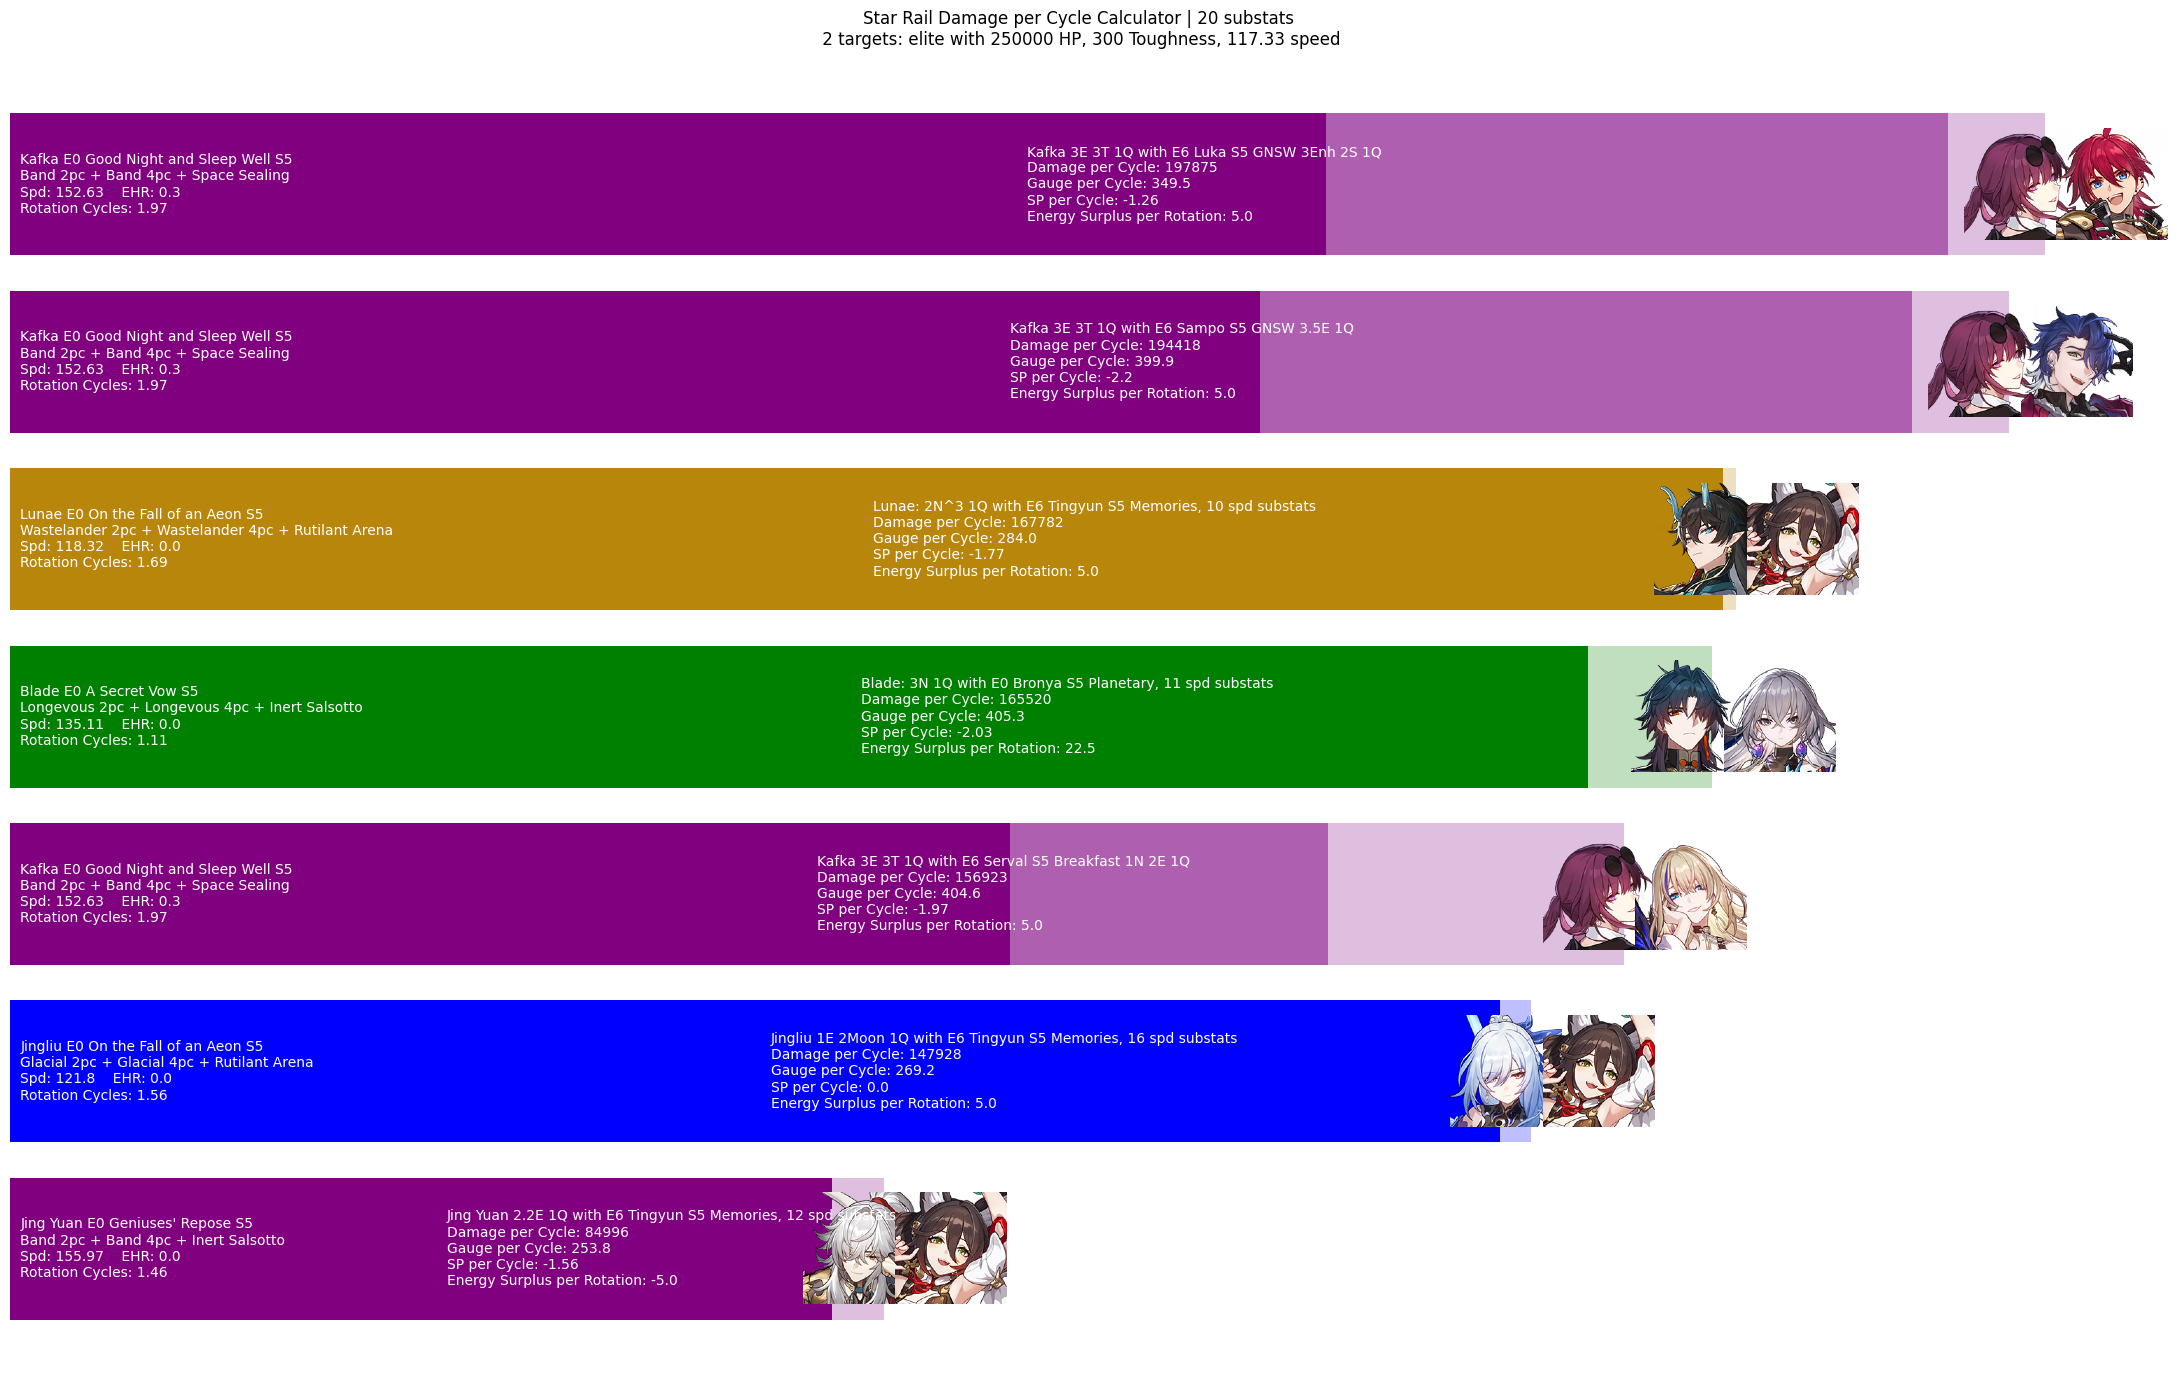

In [18]:
# Visualize
visualize(visualizationList, visualizerPath='visualizer\DuoVisual.png', **config)